## Imports

In [1]:
import os
import openai
from langchain.document_loaders import TextLoader, PyPDFLoader, Docx2txtLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import OpenAIEmbeddings
from langchain.embeddings import GPT4AllEmbeddings
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI
from langchain.llms import GPT4All
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from gpt4all import Embed4All

In [2]:
### Additional dependencies
### Especially if you want to use GPT4all
# %pip install gpt4all > /dev/null
# %pip install pypdf
# %pip install chromadb
# %pip install docx2txt
# %pip install plotly-express
# %pip install nbformat

## A quick look at embeddings and cosine similarities

### Get embeddings with GPT4all (it's free!!!)

In [3]:
embedder = Embed4All()

embed1 = embedder.embed("Dogs are animals with four legs. They are very cute and fluffy.")
embed_sim = embedder.embed("Cats are animals with four legs. They are very cute and fluffy.")
embed_rand = embedder.embed("The weather today is super sunny. I am going to the beach.")


## resize to (1, n_dim) for cosine_similarity func
embed1 = np.array(embed1).reshape(1, -1) 
embed_sim = np.array(embed_sim).reshape(1, -1)
embed_rand = np.array(embed_rand).reshape(1, -1)

stacked_embeds = np.vstack([embed1, embed_sim, embed_rand])
stacked_embeds.shape

embed1.shape

''' With OpenAI '''
# from langchain.embeddings.openai import OpenAIEmbeddings
# embedder = OpenAIEmbeddings()

# embed1 = embedder.embed_query("Dogs are animals with four legs. They are very cute and fluffy.")
# embed_sim = embedder.embed_query("Cats are animals with four legs. They are very cute and fluffy.")
# embed_rand = embedder.embed_query("Bananas are fruits. They are very sweet and delicious.")
# embed_rand2 = embedder.embed_query("Apple are fruits. They are very sweet and delicious.")

# ## resize to (1, n_dim) for cosine_similarity func
# embed1 = np.array(embed1).reshape(1, -1) 
# embed_sim = np.array(embed_sim).reshape(1, -1)
# embed_rand = np.array(embed_rand).reshape(1, -1)
# embed_rand2 = np.array(embed_rand2).reshape(1, -1)

# stacked_embeds = np.vstack([embed1, embed_sim, embed_rand, embed_rand2])

Found model file at  /Users/kamal/.cache/gpt4all/ggml-all-MiniLM-L6-v2-f16.bin


objc[549]: Class GGMLMetalClass is implemented in both /Users/kamal/miniconda3/envs/myenv/lib/python3.11/site-packages/gpt4all/llmodel_DO_NOT_MODIFY/build/libreplit-mainline-metal.dylib (0x17b214228) and /Users/kamal/miniconda3/envs/myenv/lib/python3.11/site-packages/gpt4all/llmodel_DO_NOT_MODIFY/build/libllamamodel-mainline-metal.dylib (0x17b0dc228). One of the two will be used. Which one is undefined.


' With OpenAI '

In [18]:
embed_sim.shape

(1, 384)

In [19]:
embed1

array([[ 4.63501662e-02,  7.02913967e-04,  3.01385019e-02,
         4.35452424e-02, -1.32005543e-01,  9.47442651e-03,
        -2.92135384e-02, -2.29671337e-02,  6.20180815e-02,
         9.84853208e-02,  9.20763332e-03, -4.84318510e-02,
         5.15393130e-02,  5.24170659e-02,  1.33189112e-02,
         3.48832854e-03, -4.20953892e-02,  1.44719202e-02,
        -5.06436341e-02, -7.50018191e-03, -9.78390500e-03,
        -5.41006736e-02,  1.52601637e-02,  1.59246195e-02,
        -8.14205259e-02, -1.78305041e-02, -6.41546771e-02,
        -7.36129507e-02,  3.23860198e-02, -3.07674259e-02,
        -3.16869281e-02,  6.10159375e-02, -4.61407043e-02,
        -7.92953465e-03,  1.29123777e-03, -6.09800741e-02,
         7.09839389e-02,  5.04629966e-03,  6.21156618e-02,
         6.05314672e-02,  2.34845635e-02, -2.62934342e-02,
         1.25857061e-02, -3.74076366e-02, -2.30180770e-02,
         2.23230906e-02, -4.83298786e-02, -9.71769765e-02,
         2.23960876e-02, -6.33944699e-04,  3.70944943e-0

In [20]:
# Higher = More similar!
print(cosine_similarity(embed1, embed_sim))
print(cosine_similarity(embed1, embed_rand))
print(embed1.shape)
print("num dimensions:", embed1.shape[1]) ## Number of features, much higher if using ChatGPT

[[0.83226431]]
[[0.02112949]]
(1, 384)
num dimensions: 384


### Dimensionality reduction before visualizing

In [7]:
pca = PCA(n_components=3)
z=pca.fit_transform(stacked_embeds)
print(z.shape)
print(pca.explained_variance_ratio_.cumsum())

(3, 3)
[0.88298917 1.         1.        ]


In [8]:
# no. samples x features
print(z[0,:]) # first sample
print(z[1,:])
print(z[2,:])

cosine_similarity(stacked_embeds)

[-4.49530104e-01  2.91445004e-01  3.50092946e-16]
[-4.68583954e-01 -2.87440420e-01  3.50092946e-16]
[ 9.18114058e-01 -4.00458459e-03  3.50092946e-16]


array([[ 1.        ,  0.83226431,  0.02112949],
       [ 0.83226431,  1.        , -0.00163363],
       [ 0.02112949, -0.00163363,  1.        ]])

### Visualizing

### A 2d plot

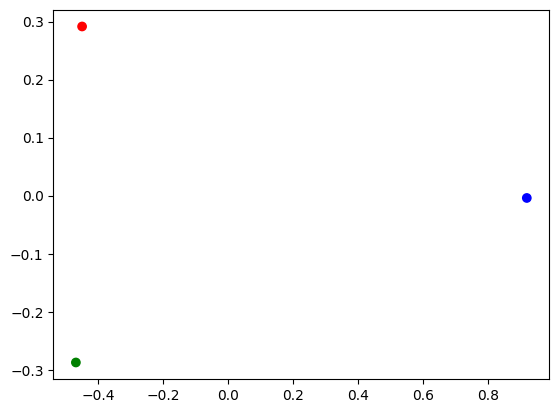

In [9]:
import matplotlib.pyplot as plt

plt.scatter(z[:,0], z[:,1], c=['r','g', 'b']) #plotting first two dims
plt.show()

#### A 3d plot

In [10]:
import plotly.express as px

# fig = px.scatter_3d(z, x=0, y=1, z=2)

import plotly.io as pio
print(pio.renderers)
pio.renderers.default = "notebook_connected"

# Show the plot
import pandas as pd
z_df = pd.DataFrame(z, columns=['x','y','z'])

fig = px.scatter_3d(data_frame=z_df, x='x', y='y', z='z', color=['r','g', 'b'])
fig.show()


Renderers configuration
-----------------------
    Default renderer: 'vscode'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']



In [11]:
z

array([[-4.49530104e-01,  2.91445004e-01,  3.50092946e-16],
       [-4.68583954e-01, -2.87440420e-01,  3.50092946e-16],
       [ 9.18114058e-01, -4.00458459e-03,  3.50092946e-16]])

## Let's build something!

In [22]:
openai.api_key = os.getenv("OPENAI_API_KEY")

In [24]:
# data_file = "wild-delights-obooko.pdf"
# data_file = "1511.08458v2.pdf"
# data_file = "2022_Annual_Report.docx"
data_file = "resume_1.pdf"

if data_file.endswith(".pdf"):
    loader = PyPDFLoader(os.path.join(os.getcwd(), f"data/{data_file}"))
elif data_file.endswith(".docx"):
    loader = Docx2txtLoader(os.path.join(os.getcwd(), f"data/{data_file}"))
else:
    loader = TextLoader(os.path.join(os.getcwd(), f"data/{data_file}"))

data = loader.load()

### Split Document

In [25]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 500, chunk_overlap = 0)
all_splits = text_splitter.split_documents(data)
print(len(all_splits))
all_splits

7


[Document(page_content='Noob Developer\n+0x0x0x0x0x | noob@noob.com \nEDUCATION\nUNIVERSITY OF TESTING \nBachelor of Science in Computer Science, June 2024\nEXPERIENCE\nBackend Developer | Company Name:\nOct 2022 - Feb 2023\n●\nDeveloped authentication System with OAuth 2.0\n●\nWorked with various data storage technologies, such as PostgreSQL, MySQL,\nMongoDB, and Redis, depending on the requirements and constraints of the\nprojects.\n●\nCollaborated with Front-end developers to integrate user-facing elements with\nserver-side logic\n●', metadata={'source': '/Users/kamal/Documents/docspeaker/data/resume_1.pdf', 'page': 0}),
 Document(page_content='Deployed and maintained applications on various hosting platforms, such as\nAWS, Heroku using Docker \n●\nWorked to integrate dif ferent payment options with dif ferent paywall APIs such as \nPaypal, Stripe, and Paystack.\nPROJECTS\nShoSho Media (Django, PostgreSQL, AWS)\nHere \n● Used Django to create a social network where people of similar

### Store embeddings of each split

In [15]:
### Could use OpenAI embeddings if wanted
# vectorstore = Chroma.from_documents(documents=all_splits, embedding=OpenAIEmbeddings())
vectorstore = Chroma.from_documents(documents=all_splits, embedding=GPT4AllEmbeddings())

Found model file at  /Users/kamal/.cache/gpt4all/ggml-all-MiniLM-L6-v2-f16.bin


In [16]:
## General questions
instructions = "Please answer the following questions about the candidate. Your answers should be bullet points."
question1 = "Can you summarize the candidate's experience? What are their strengths and weaknesses?"
question2 = "Would this be a good hire for a junior position? "
question3 = "Can you suggest improvements to the CV to make it stand out more?"

## More specific questions
question4 = "Does the candidate have experience in Python?"

## Fun questions
question5 = "Roast this resume."

### Create ChatGPT model with Memory

In [ ]:
# If you have a beefy computer you can download and run gpt4all locally
# local_path = (os.path.join(os.getcwd(), "models/wizardlm-13b-v1.1-superhot-8k.ggmlv3.q4_0.bin"))
# llm = GPT4All(model=local_path, verbose=True)

llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)

from langchain.chains import ConversationalRetrievalChain
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

qa_chain = ConversationalRetrievalChain.from_llm(llm, vectorstore.as_retriever(), memory=memory)

In [ ]:
ans1 = qa_chain({"question": instructions+question1})
ans2 = qa_chain({"question": instructions+question2})
ans3 = qa_chain({"question": instructions+question3})
ans4 = qa_chain({"question": instructions+question4})
ans5 = qa_chain({"question": instructions+question5})

### Q1. Can you summarize the candidate's experience? What are their strengths and weaknesses

In [ ]:
print(ans1["answer"])

Experience:
- Backend Developer at Company Name from Oct 2022 to Feb 2023
  - Developed authentication system with OAuth 2.0
  - Worked with various data storage technologies (PostgreSQL, MySQL, MongoDB, Redis)
  - Collaborated with Front-end developers to integrate user-facing elements with server-side logic
  - Implemented features such as chat, notifications, comments, and threads
  - Implemented tag search functionality with AJAX
  - Used Django to query the database for user-specific results
  - Created a real-time web app (TaxiHub) for creating orders and broadcasting them to nearby drivers

Strengths:
- Proficient in backend development and authentication systems
- Experience with various data storage technologies
- Strong collaboration skills with front-end developers
- Ability to implement multiple features and functionalities
- Familiarity with Django and web sockets for real-time applications

Weaknesses:
- No information provided about specific challenges faced or problem-s

### Q2. Would this be a good hire for a junior position? 

In [ ]:
print(ans2["answer"])

Based on the provided information, the candidate appears to have relevant experience as a Backend Developer and has worked with various data storage technologies. They have also collaborated with Front-end developers and implemented user authentication and authorization. Additionally, they have deployed a project to a production server and have experience with technologies such as Django, HTML, CSS, and JavaScript. Overall, the candidate seems to have the necessary skills and experience for a junior position.


### Q3. Can you suggest improvements to the CV to make it stand out more?

In [ ]:
print(ans3["answer"])

To make the candidate's CV stand out more, here are some improvements that can be suggested:

1. Add a summary or objective statement: Begin the CV with a brief summary or objective statement that highlights the candidate's key skills, experiences, and career goals. This will give employers a quick overview of the candidate's qualifications.

2. Highlight specific achievements: Instead of just listing job responsibilities, emphasize specific achievements and outcomes from previous experiences. This could include successful projects, improvements made, or any recognition received.

3. Provide more details about projects: For each experience, provide more details about the projects the candidate worked on. Include information about the technologies used, the scope of the project, and the impact it had on the organization or users.

4. Include relevant coursework: Since the candidate is a recent graduate, including relevant coursework can showcase their knowledge and skills in specific ar

### Q4. Does the candidate have experience in Python?

In [ ]:
print(ans4["answer"])

Yes, the candidate has experience in Python.


### Q.5 Roast my resume

In [ ]:
print(ans5["answer"])

Based on the provided context, here are some areas for improvement in this resume:

1. Lack of specific details: The resume could benefit from including specific details about the projects and tasks accomplished. For example, instead of just mentioning the use of React Bootstrap and Axios, it would be helpful to mention specific features or functionalities implemented using these tools.

2. Missing information about project scope and impact: It would be beneficial to include information about the scale and impact of the projects worked on. For example, mentioning the number of users or the size of the team involved in the library management system project would provide a better understanding of the candidate's experience.

3. Limited mention of programming languages and frameworks: While the resume mentions Python, C#, and JavaScript as programming languages, it does not provide any information about the level of proficiency or specific projects completed using these languages. Similar

### How is the correct split chosen to send to ChatGPT?

In [ ]:
### In cases where we are looking for specific information, we can use the following
docs = vectorstore.similarity_search_with_score(question4)
len(docs)
docs

[(Document(page_content='Programming Languages:\nPython, C#, Javascript\n●\nFramework:\nDjango, React\n●\nTools:\nGit, AWS,MYSQL, PostgreSQL, Docker', metadata={'page': 1, 'source': '/Users/kamal/Documents/docspeaker/data/Resume Dummy.pdf'}),
  1.3652894496917725),
 (Document(page_content='Programming Languages:\nPython, C#, Javascript\n●\nFramework:\nDjango, React\n●\nTools:\nGit, AWS,MYSQL, PostgreSQL, Docker', metadata={'page': 1, 'source': '/Users/kamal/Documents/docspeaker/data/resume_1.pdf'}),
  1.3652894496917725),
 (Document(page_content="● Implemented user authentication and authorization using Django's built-in\nauthentication system and custom permissions.\n● Created a user-friendly interface using HTML, CSS, and JavaScript, allowing\nlibrarians to easily search for and manage books, borrowers, and transactions.\n●\nDeployed the library management system to a production server using the WSGI\nweb server and Gunicorn application server\nOther projects can be found in my GitHu